In [1]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Default config but with 30k iterations, changes in the interaction radius, movement and age and death

In [2]:
RUN_NAME = 'metrics_config1_big'
CONFIG_NAME = 'config1_big.json'

SAVE_FIG = True

In [3]:
# Load the configuration file
with open(os.path.join('..', 'config', CONFIG_NAME), 'r') as f:
    config = json.load(f)

In [4]:
# Create the directory for the visualisation files
if SAVE_FIG and not os.path.exists(RUN_NAME):
    os.makedirs(RUN_NAME)

In [5]:
# Load data
df = pd.read_csv(f"{RUN_NAME}.csv")

In [6]:
# Add average amount over iterations
df['average_transaction_amount'] = df['total_transactions_amount'] / df['transactions_count']

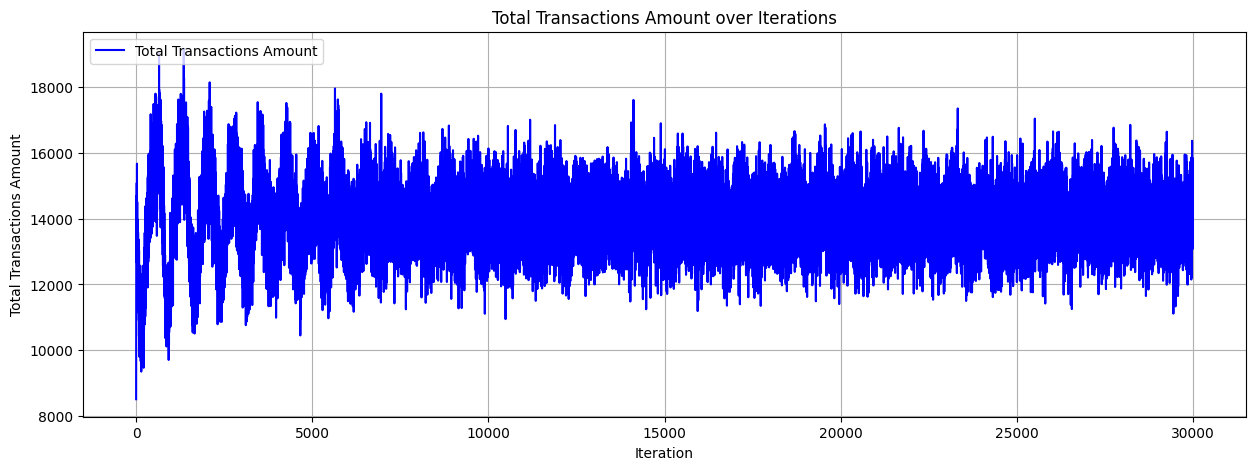

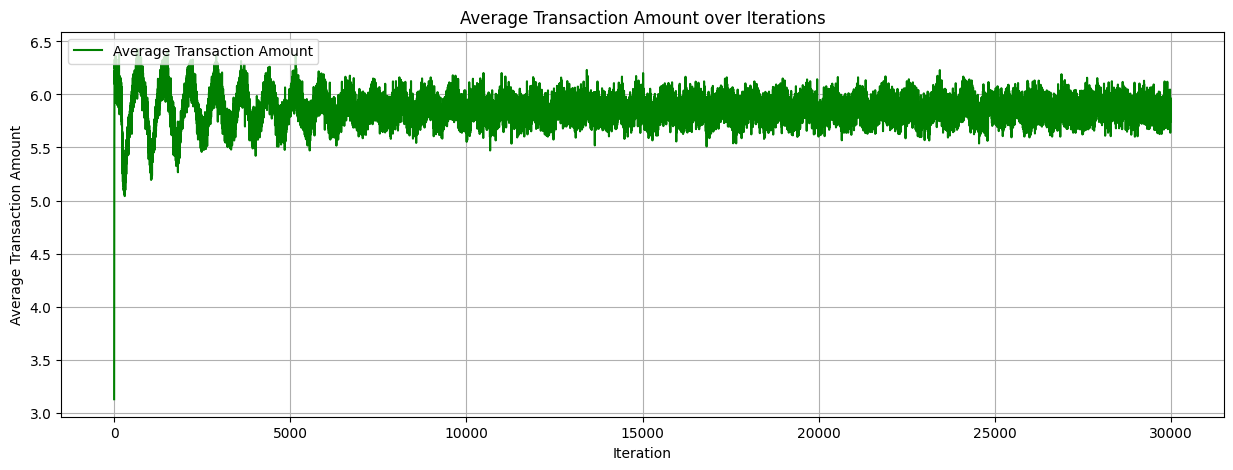

In [7]:
# Plot total transactions amount over iterations
plt.figure(figsize=(15, 5))
plt.plot(df['iteration'], df['total_transactions_amount'], label='Total Transactions Amount', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Total Transactions Amount')
plt.title('Total Transactions Amount over Iterations')
plt.legend(loc='upper left')
plt.grid()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_total_transactions_amount.png"))
plt.show()

# Plot average transaction amount over iterations
plt.figure(figsize=(15, 5))
plt.plot(df['iteration'], df['average_transaction_amount'], label='Average Transaction Amount', color='green')
plt.xlabel('Iteration')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount over Iterations')
plt.legend(loc='upper left')
plt.grid()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_average_transaction_amount.png"))
plt.show()


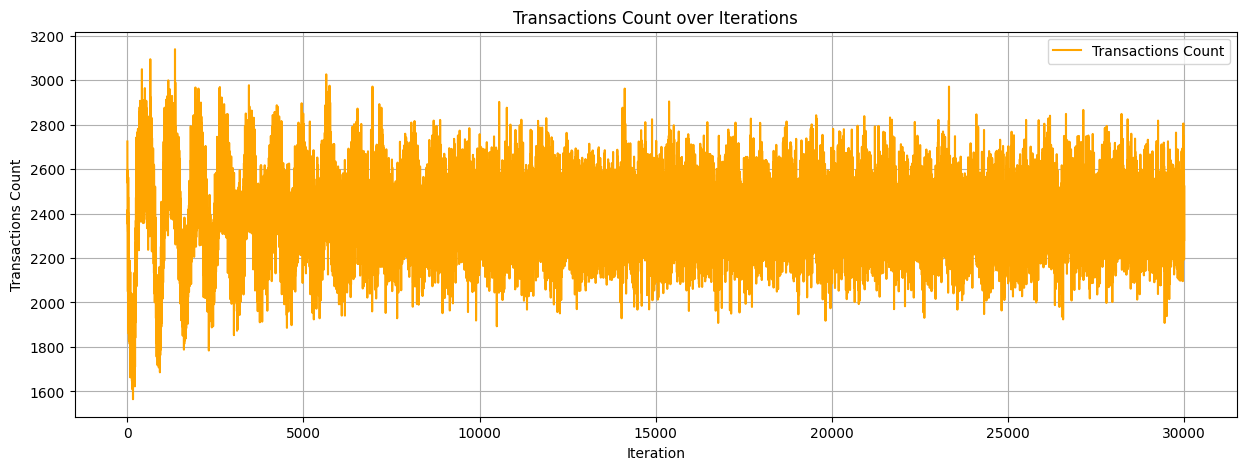

In [8]:
# Plot total transactions count over iterations
plt.figure(figsize=(15, 5))
plt.plot(df['iteration'], df['transactions_count'], label='Transactions Count', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Transactions Count')
plt.title('Transactions Count over Iterations')
plt.legend()
plt.grid()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_total_transactions_count.png"))
plt.show()

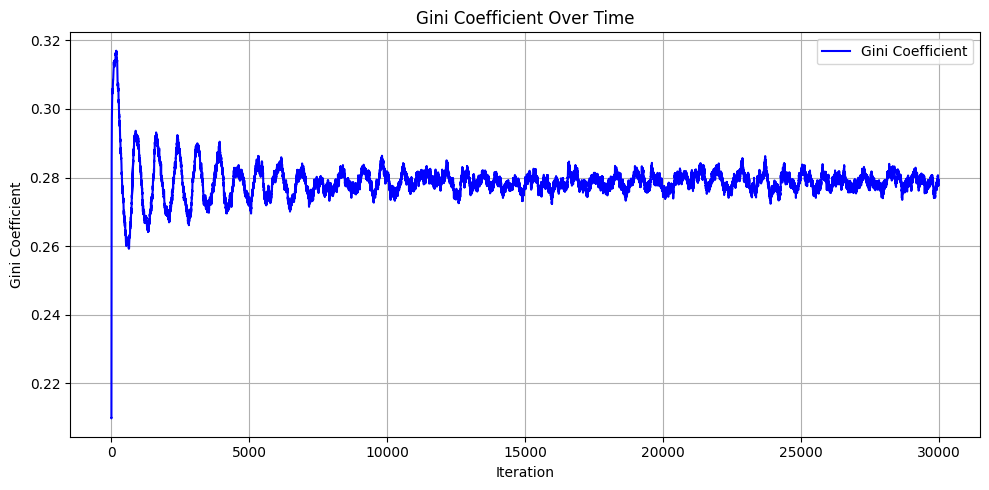

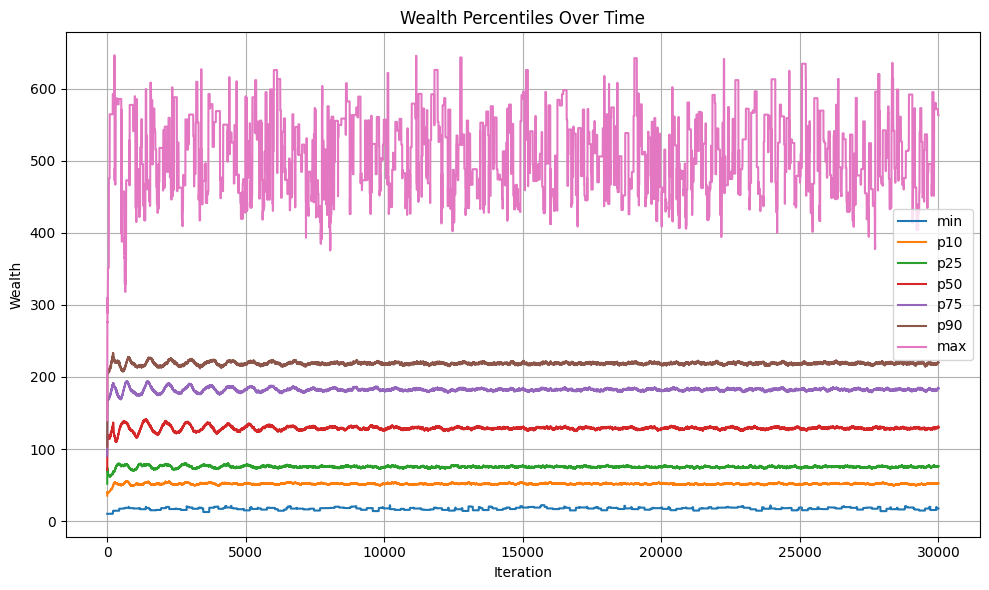

In [9]:
# Plot Gini coefficient over time
plt.figure(figsize=(10, 5))
plt.plot(df["iteration"], df["gini"], label="Gini Coefficient", color="blue")
plt.xlabel("Iteration")
plt.ylabel("Gini Coefficient")
plt.title("Gini Coefficient Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_gini_coefficient.png"))
plt.show()

# Plot wealth percentiles over time
plt.figure(figsize=(10, 6))
for col in ["min", "p10", "p25", "p50", "p75", "p90", "max"]:
    plt.plot(df["iteration"], df[col], label=col)

plt.xlabel("Iteration")
plt.ylabel("Wealth")
plt.title("Wealth Percentiles Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_wealth_perc_time.png"))
plt.show()

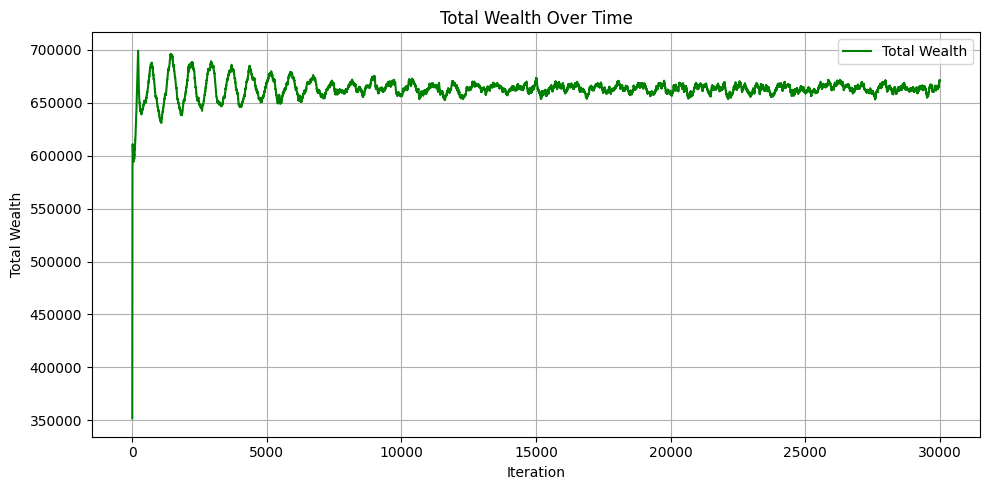

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df["iteration"], df["total_wealth"], label="Total Wealth", color="green")
plt.xlabel("Iteration")
plt.ylabel("Total Wealth")
plt.title("Total Wealth Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_total_wealth.png"))
plt.show()

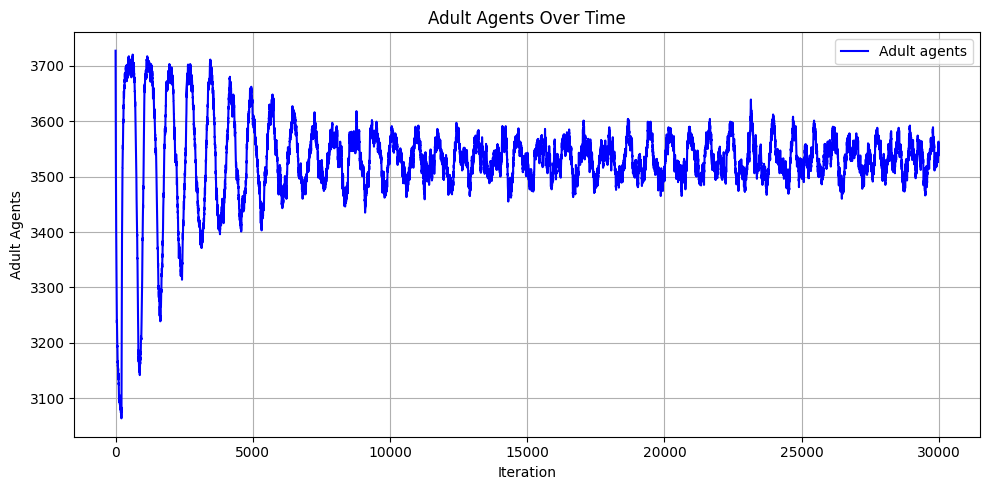

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df["iteration"], df["adult_agents"], label="Adult agents", color="blue")
plt.xlabel("Iteration")
plt.ylabel("Adult Agents")
plt.title("Adult Agents Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_adult_agents.png"))
plt.show()


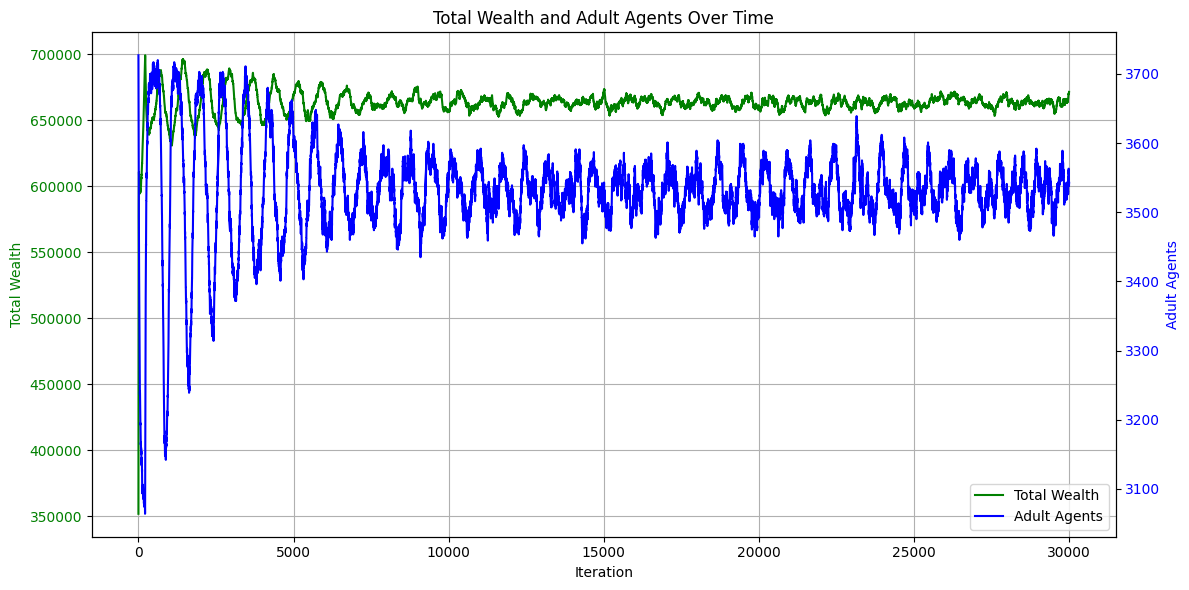

In [12]:
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df["iteration"], df["total_wealth"], label="Total Wealth", color="green")
ax2.plot(df["iteration"], df["adult_agents"], label="Adult Agents", color="blue")

ax1.set_xlabel("Iteration")
ax1.set_ylabel("Total Wealth", color="green")
ax2.set_ylabel("Adult Agents", color="blue")

ax1.tick_params(axis='y', labelcolor="green")
ax2.tick_params(axis='y', labelcolor="blue")

ax1.set_title("Total Wealth and Adult Agents Over Time")
ax1.grid(True)

# Legends for both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="lower right")

plt.tight_layout()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_total_wealth_and_adult_agents.png"))
plt.show()

Mid age (years): 80.0
Steepness: 0.02


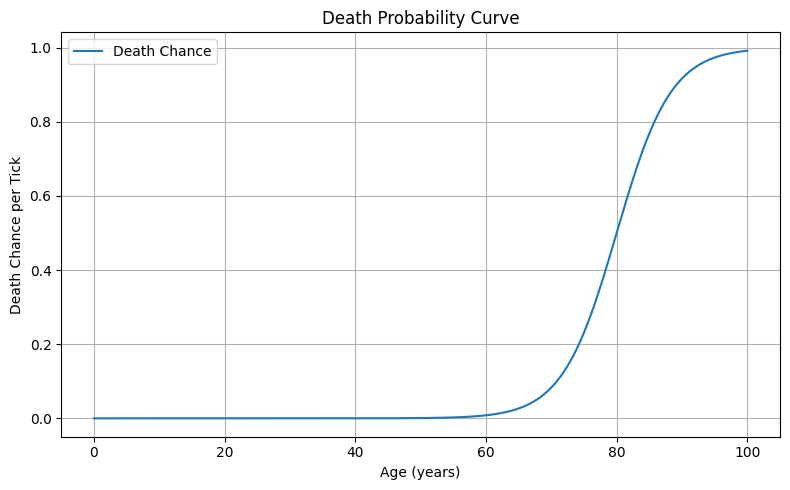

In [13]:
import numpy as np
import matplotlib.pyplot as plt

mid_age_years = config['age_and_death']['mid_age']      # age where death chance is 50%
print(f"Mid age (years): {mid_age_years}")
steepness = config['age_and_death']['steepness']        # how quickly death probability rises with age
print(f"Steepness: {steepness}")

ages = np.linspace(0, 100, 500)
mid_age = mid_age_years * 12

death_chance = 1.0 / (1.0 + np.exp(-steepness * (ages * 12 - mid_age)))

plt.figure(figsize=(8, 5))
plt.plot(ages, death_chance, label="Death Chance")
plt.xlabel("Age (years)")
plt.ylabel("Death Chance per Tick")
plt.title("Death Probability Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_death_probability_curve.png"))
plt.show()

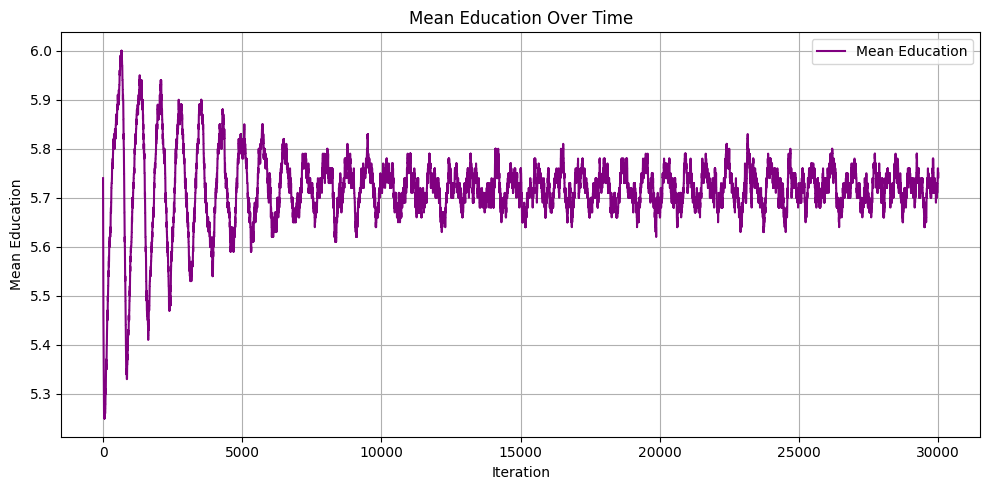

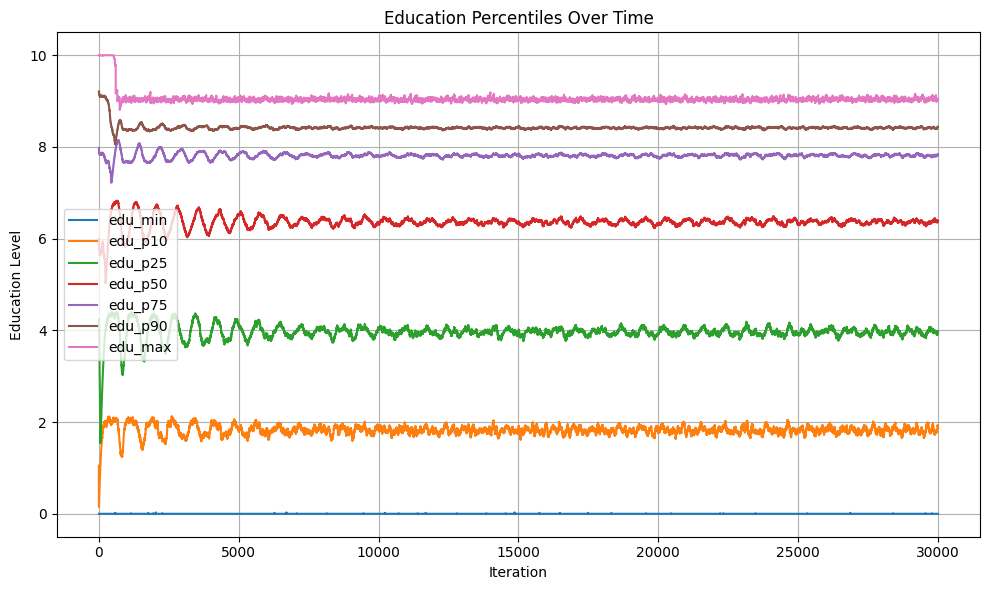

In [14]:
# Plot mean education over time
plt.figure(figsize=(10, 5))
plt.plot(df["iteration"], df["edu_mean"], label="Mean Education", color="purple")
plt.xlabel("Iteration")
plt.ylabel("Mean Education")
plt.title("Mean Education Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_mean_education.png"))
plt.show()

# Plot education percentiles over time
plt.figure(figsize=(10, 6))
for col in ["edu_min", "edu_p10", "edu_p25", "edu_p50", "edu_p75", "edu_p90", "edu_max"]:
    plt.plot(df["iteration"], df[col], label=col)
plt.xlabel("Iteration")
plt.ylabel("Education Level")
plt.title("Education Percentiles Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(os.path.join(RUN_NAME, f"{RUN_NAME}_education_perc_time.png"))
plt.show()